<a href="https://colab.research.google.com/github/PhanQuangTan/CS114.K21/blob/master/PredictTheTime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Kết nối với drive

In [0]:
import requests
file_url = 'https://cs.uit.edu.vn/data2.txt'
r = requests.get(file_url, stream = True)
with open('/content/drive/My Drive/Dataset/data.txt', 'wb') as file:
  for block in r.iter_content(chunk_size = 1024):
    if block:
      file.write(block)

# Hàm đọc file và file về drive

In [0]:
import numpy as np
import pandas as pd

In [0]:
def paretxt(fname):
  for line in open(fname, 'r'):
    yield eval(line)

# Hàm đọc dữ liệu và đưa vào mảng

In [0]:

file_name = '/content/drive/My Drive/Dataset/data.txt'
data = list(paretxt(file_name))

# Load dữ liệu

In [10]:
df = pd.DataFrame(data)
df.columns=['size', 'time']
print(df)


          size      time
0      6083695  0.521842
1      1954367  0.152648
2      3734185  0.298548
3      5839301  0.460480
4      6343427  0.527977
...        ...       ...
71110  4472112  0.350379
71111  5471895  0.429955
71112  9837364  0.801394
71113  9466593  0.776407
71114  4080801  0.314468

[71115 rows x 2 columns]


In [0]:
df['size^2'] = df['size'] * df['size']

In [12]:
print(df)

          size      time          size^2
0      6083695  0.521842  37011344853025
1      1954367  0.152648   3819550370689
2      3734185  0.298548  13944137614225
3      5839301  0.460480  34097436168601
4      6343427  0.527977  40239066104329
...        ...       ...             ...
71110  4472112  0.350379  19999785740544
71111  5471895  0.429955  29941634891025
71112  9837364  0.801394  96773730468496
71113  9466593  0.776407  89616383027649
71114  4080801  0.314468  16652936801601

[71115 rows x 3 columns]


In [0]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

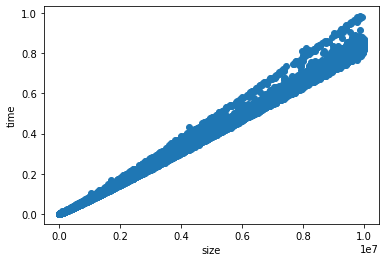

In [16]:
plt.scatter(df['size'], df['time'])
plt.xlabel('size')
plt.ylabel('time')
plt.show()

In [0]:
X = df['size']
y = df['time']

In [18]:
print(df)

          size      time          size^2
0      6083695  0.521842  37011344853025
1      1954367  0.152648   3819550370689
2      3734185  0.298548  13944137614225
3      5839301  0.460480  34097436168601
4      6343427  0.527977  40239066104329
...        ...       ...             ...
71110  4472112  0.350379  19999785740544
71111  5471895  0.429955  29941634891025
71112  9837364  0.801394  96773730468496
71113  9466593  0.776407  89616383027649
71114  4080801  0.314468  16652936801601

[71115 rows x 3 columns]


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
print (X_train)
print (y_train)
print (y_test)


In [0]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [0]:
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [22]:
print(X_train)

[[1627030]
 [3916188]
 [8316697]
 ...
 [8066726]
 [7788773]
 [5966880]]


In [29]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# chọn model: LinearRegression  vì dữ liệu thuộc regression.
# train bằng model.fit()

In [30]:
pred = regr.predict(X_test)
print(pred)

[0.20914457 0.62236319 0.17997325 ... 0.46799437 0.36128699 0.42837295]


In [25]:
print('He So: \n', regr.coef_)

He So: 
 [8.45606811e-08]


In [0]:
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
print('Loi binh phuong: %.4f' % mean_squared_error(y_test, pred))

Loi binh phuong: 0.0002


In [33]:
print('He so xac dinh: %.6f' % r2_score(y_test, pred))

He so xac dinh: 0.997440


# đánh giá model thông qua cost function với đọ chính xác lên đến 99% nên là model khá tốt

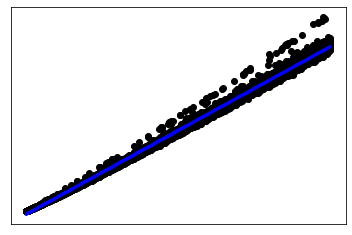

In [28]:

plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# Dùng model trên sau đó nhập data chưa mới vào đó